<h1 style='font-size:40px'> Case Engenharia de ML</h1>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Este arquivo contém a resolução dos desafios propostos para o case de Engenharia de ML.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Desafio 1</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A CRISP-DM é a principal metodologia utilizada em projetos de Ciência de Dados e Mineração de Dados.
        </li>
        <li> 
            Ela é dividida em 6 etapas principais. Nós exemplificaremos cada uma delas nos baseando em um projeto de previsão de NPL's:
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Entendimento do Negócio</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Nessa fase, o Cientista deve conhecer as atividades da área de negócio e entender as suas ambições envolvendo o projeto. 
        </li>
        <li> 
            Uma vez feito isso, ele deve acordar com a área cliente o critério de sucesso a ser usado.
        </li>
        <li> 
            No contexto de um projeto de previsões de NPL, é fundamental o Cientista de Dados conhecer as principais avaliações para concessão de crédito do banco. Uma vez feito isso, ele deve estabelecer os critérios que definirão o sucesso do modelo a ser produzido. 
            <p style='margin-top:10px'> 
                <i>Obs</i>: Pode-se existir um critério de negócio (redução em x% dos NPL's) e um técnico (acréscimo de x% no f1-score do algoritmo).
            </p>
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Entendimento dos Dados</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Iniciamos essa etapa definindo quais dados nosso projeto precisará e em quais bases podemos obtê-los. É interessante consultar os Arquitetos e Engenheiros de Dados a fim de sanarmos essas questões e montarmos o dataset do trabalho.
        </li>
        <li> 
            Tendo os dados em mãos, podemos iniciar a nossa EDA. Nela, identificaremos padrões e relações entre as informações. É essencial localizarmos possíveis problemas nos dados, como outliers e valores nulos. 
        </li>
        <li> 
            No contexto de um projeto de NPL's, deveremos obter acesso às bases de empréstimos e clientes e estudar os dados. Na análise, temos entender as principais diferenças das informações de clientes inadimplentes e os com pagamento em dia. 
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Preparação dos dados</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Consiste no devido tratamento dos dados para que eles sejam recebidos por um modelo de I.A.
        </li>
        <li> 
            Nessa etapa, escolhemos os atributos com os quais trabalharemos; tratamos valores nulos e strings; e normalizamos os dados numéricos. Temos que nos preocupar com a remoção outliers (usando IQR, $\sigma$...) e dados categóricos de pouca presença no dataset.
        </li>
        <li> 
            Quando montamos uma I.A baseada em dados de clientes bancários, precisamos substituir informações categóricas por dados numéricos (usando um GROUP BY, por exemplo). Podemos preencher nulos com Imputers pré-programados de nossos frameworks.
        </li>
     </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Modelagem</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Tendo os dados tratados, estamos aptos para criar os algoritmos de Machine Learning. Mas, antes de iniciarmos os fittings, devemos segregar a nossa matriz em um set de treino, validação e teste. Isso, a fim de evitarmos o overfitting dos algoritmos.
        </li>
        <li> 
            Uma vez segregada a matriz, iniciamos o treinamento de diversos tipos de modelos. Buscamos sempre encontrar a melhor combinação de hiperparâmetros treinando-os no set de treino e avaliando-os no set de validação.
        </li>
        <li> 
            Os candidatos a deployment vão ser aqueles que atingiram as melhores métricas qualitativas no set de teste.
        </li>
     </ul>
</div>

<h2 style='font-size:30px'> Desafio 2</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Iniciaremos por aqui o carregamento das bases do projeto e realização da EDA.
        </li>
        <li> 
            Como o esquema da Base de Dados nos mostra, temos acesso tanto aos dados do cliente com a nossa instituição, quanto com outros bancos. Portanto, acredito que a EDA deverá ser feita de maneira apartada para cada espécie de informação.
            <center style='margin-top:20px'> 
                <img src='../img/schema.png'>
            </center>
        </li>
    </ul>
</div>

In [1]:
import pandas as pd

# Permitindo a visualização de todas as colunas de nossos DataFrames.
pd.set_option('display.max_columns', None)

In [2]:
# Carregando os dados do arquivo principal.
df_train = pd.read_csv('/kaggle/input/home-credit-default-risk/application_train.csv')
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Vamos aproveitar a situação e criar DataFrames separados para clientes em dia e inadimplentes.
df_train_0 = df_train[df_train['TARGET']==0]
df_train_1 = df_train[df_train['TARGET']==1]

<h3 style='font-size:30px;font-style:italic'> EDA Dados Gerais</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Iniciando a análise envolvendo apenas as informações gerais dos clientes do banco.
        </li>
     </ul>
</div>

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Distribuição das Targets</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            É muito importante, em qualquer projeto de classificação, conhecermos as proporções de nossas classes-alvo. Essas informações auxiliarão o Cientista de Dados a definir a métrica qualitativa mais apropriada. 
        </li>
        <li> 
            Analisando o gráfico abaixo, enxergamos que os inadimplentes representam cerca de 8% do set de treino. 
        </li>
     </ul>
</div>

In [4]:
# Vamos montar uma pequena função responsável por criar gráficos de barras para comparação de proporções.
# Ela será de bastante utilidade na EDA do projeto.
from typing import Iterable
def bar_prop(x:Iterable[int], y:Iterable[float], title:str)->None:
    '''
        Função para montagem de um gráfico de barras voltado à comparação de proporções.

        Parâmetros
        ----------
        `x`:Iterable
            Objeto iterável com as abscissas do gráfico.
        `y`:Iterable
            Objeto iterável com o valor das ordenadas do gráfico.
        `title`: str
            Título do gráfico.
    '''
    # Plotando o gráfico.
    plt.bar(x, y) 
    
    # Definindo título e ticks.
    plt.title(title, pad=20)
    plt.xticks(x)
    plt.yticks([])
    
    # Inserindo o valor das %'s no gráfico.
    for i, p in zip(x, y):
        plt.text(i-7e-2, p+2e-2, f'{round(p, 2)*100}%', fontdict={'size':12})

    # Removendo parte da moldura do gráfico.
    ax = plt.gca()
    ax.spines[['right', 'left', 'top']].set_visible(False);

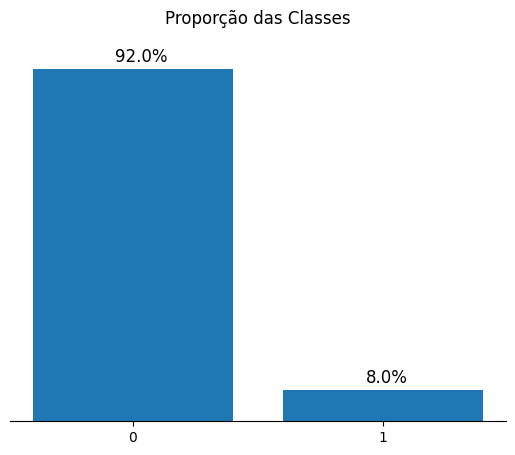

In [5]:
import matplotlib.pyplot as plt

# Extraindo a proporção de ocorrências de cada classe e criando o gráfico de barras.
gb_target = (df_train.groupby('TARGET')['TARGET'].count()/len(df_train))
bar_prop(gb_target.index, gb_target.values, 'Proporção das Classes')

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Proporção do Crédito Sobre a Renda do Cliente</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Me chamou a atenção que possuímos features sobre valor do empréstimo e renda do cliente.
        </li>
        <li> 
            Poderíamos levantar uma hipótese: pessoas com `TARGET==1` se encontram inadimplentes porque os empréstimos que elas contraem representam uma parcela muito grande de sua renda, o que dificultaria o pagamento da dívida. 
        </li>
        <li> 
            Ao mesmo tempo, podemos supor que pessoas não inadimplentes obtêm empréstimos mais conservadores e, assim, mais fáceis de serem quitados. 
        </li>
     </ul>
</div>

In [6]:
# Criando uma coluna com os quocientes entre valor do empréstimo e renda.
df_train['CREDIT_INCOME_RATIO'] = df_train['AMT_CREDIT'] / df_train['AMT_INCOME_TOTAL']

# No entanto, vemos que os quocientes de ambos os grupos apresentam médias e desvios-padrões bastante semelhantes.
# Provavelmente, não existe uma diferença estatisticamente significativa entre o quociente das classes.
df_train.groupby('TARGET')['CREDIT_INCOME_RATIO'].agg(['mean', 'std'])

,mean,std
TARGET,,
0,3.963729,2.695055
1,3.887438,2.627348


In [7]:
# Formalizando a rejeição de nossa hipótese com um ztest (alpha=.05).
from statsmodels.stats.weightstats import ztest

# H0: A razão entre valor do empréstimo e renda dos clientes em dia e inadimplentes é igual.
# H1: A razão entre valor do empréstimo e renda dos clientes em dia é menor do que a dos inadimplentes.

# Como o p-valor do teste foi maior do que nosso Nível de Significância, não possuímos evidências que comprovem que pessoas
# não inadimplentes contraem empréstimos mais "conservadores" do que as com pagamentos em atraso.
ztest(df_train[df_train['TARGET']==0]['CREDIT_INCOME_RATIO'], 
      df_train[df_train['TARGET']==1]['CREDIT_INCOME_RATIO'],
      alternative='smaller')[1] # p-valor.

0.9999908592179366

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Comparativo Entre Empregados e Desempregados</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            É possível verificarmos se a taxa de inadimplência é maior entre pessoas que estão desempregadas. A ausência de uma fonte de remuneração é um fator que pode impactar negativamente a quitação da dívida.
        </li>
        <li> 
            A coluna DAYS_EMPLOYED  assume números negativos quando a pessoa está sem emprego e positivos quando empregada . Seria interessante gerarmos uma feature binária que sinalizasse essa situação para nós.
        </li>
     </ul>
</div>

In [8]:
# Vamos considerar indivíduos com DAYS_EMPLOYED<0 como desempregados. 
import numpy as np
df_train['EMPLOYED'] = np.where(df_train['DAYS_EMPLOYED']<0, 0, 1)

# Realizando as contagens das flags de EMPLOYED entre pessoas inadimplentes e as com empréstimos em dia.
gb_employed = df_train.groupby(['TARGET', 'EMPLOYED'])['SK_ID_CURR'].count()
gb_employed

TARGET  EMPLOYED
0       0           230301
        1            52385
1       0            21834
        1             2991
Name: SK_ID_CURR, dtype: int64

<div> 
    <ul style='font-size:20px'>
        <li> 
            Conduziremos aqui um outro Teste de Hipóteses, agora avaliando se as proporções de desempregados nas classes são estatisticamente distintas.
        </li>
     </ul>
</div>

In [9]:
# Como pretendo fazer testes envolvendo outras colunas binárias, criarei uma função que automatizará todo o processo.
from statsmodels.stats.proportion import test_proportions_2indep
def hypo_prop(gb:pd.Series, flag_value:int, alternative:str, compare:str):
    '''
        Função que automatizará testes de hipóteses que comparam proporções das TARGET's em diferentes colunas de flag.
        
        Parâmetros
        ----------
        `gb`: pd.Series
            Uma Series MultiIndex que possui a contagem das TARGET's em cada uma das classes binárias.
        `flag_value`: int
            Valor da flag que estamos analisando (estamos comparando as proporções nas classes positivas ou negativas?)
        `alternative`: {'two-sided', 'smaller', 'larger'}
            Qual o tipo de teste que queremos fazer? 
            
                - smaller: Quando queremos analisar se os clientes em dia têm a proporção da classe menor do que os inadimplentes.
                - larger: Quando queremos analisar se os clientes em dia têm a proporção da classe maior do que os inadimplentes.
                - two-sided: Quando queremos analisar se a proporção entre as TARGET's é estatisticamente diferente.
        
        `compare`: {'diff', 'ratio' 'odds-ratio'}
            Que tipo de comparação vamos fazer entre as proporções?
            
        Retorna
        -------
        O p-valor do teste de hipóteses demandado.
    '''
    # Quantidade de instâncias inadimplentes e em dia no Group By.
    num_0, num_1 = gb.groupby(level=0).sum()
    
    # Quantidade de instâncias inadimplentes e em dia que estão com o valor da flag desejado.
    num_0_flag, num_1_flag = gb.xs(flag_value, level=1) 

    # Retornando o p-valor do Teste. 
    return test_proportions_2indep(num_0_flag, num_0, num_1_flag, num_1, alternative=alternative, 
                            compare=compare, return_results=False)[1]

In [10]:
# H0: A proporção de desempregados do grupo dos inadimplentes e clientes em dia é igual. 
# H1: A proporção de desempregados entre os clientes em dia é menor do que a entre os inadimplentes.

# Constatamos que o p-valor é muito menor do que nosso alpha. Portanto, estamos aptos a rejeitar H0.
hypo_prop(gb_employed, 0, 'smaller', 'ratio')

5.741318090784797e-204

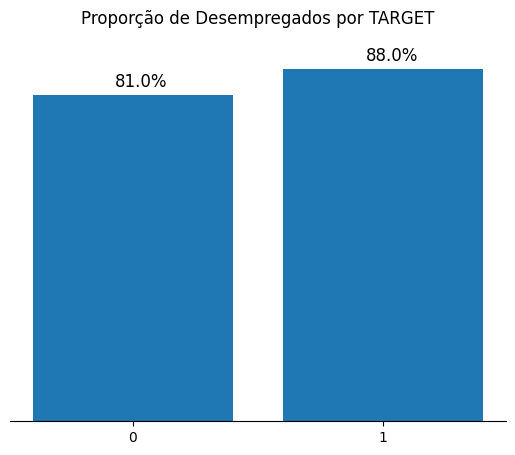

In [11]:
# Vamos evidenciar a diferença com um gráfico.
num_unemp_0, num_unemp_1= gb_employed.xs(0, level=1)  # Número de desempregados por TARGET.
prop_unemp = [num_unemp_0/len(df_train_0), num_unemp_1 / len(df_train_1)]

# Invocando `bar_plot` para gerarmos o gráfico.
bar_prop([0,1], prop_unemp, 'Proporção de Desempregados por TARGET')

<h3 style='font-size:30px;font-style:italic'> EDA Histórico Parcelas </h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Nesta EDA, estudaremos o pagamento das parcelas de empréstimos anteriores do cliente com a nossa instituição.
        </li>
     </ul>
</div>

In [12]:
# Carregando a base de parcelas de empréstimos anteriores com o banco.
df_installments = pd.read_csv('/kaggle/input/home-credit-default-risk/installments_payments.csv')

# Agregando a coluna de TARGET da basse principal.
df_installments = df_installments.merge(df_train[['TARGET', 'SK_ID_CURR']], how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df_installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT,TARGET
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360,0
1,2452854,161674,1.0,21,-546.0,-552.0,11302.605,11302.605,0
2,1054186,161674,1.0,2,-1300.0,-1307.0,6948.360,6948.360,0
3,1682318,161674,1.0,2,-240.0,-243.0,7374.510,7374.510,0
4,2452854,161674,1.0,10,-876.0,-882.0,11302.605,11302.605,0


<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Pagamento Completo das Parcelas</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Verificando se os clientes tidos como inadimplentes já possuíam um costume maior de não pagarem a totalidade das suas parcelas.
        </li>
     </ul>
</div>

In [13]:
# Criando uma coluna de FLAG de pagamentos menores do que o acordado.
df_installments['LOWER_PAYMENT'] = (df_installments['AMT_INSTALMENT']>df_installments['AMT_PAYMENT']).astype(np.int8)

In [14]:
# `df_lower_pymt` armazenará um indicador binário sinalizando se o dado cliente já realizou pagamentos menores em qualquer um dos empréstimos.
df_lower_pymt = (df_installments.groupby(['SK_ID_CURR', 'TARGET'])['LOWER_PAYMENT'].sum()>0).astype('int8').reset_index()

# Já que estamos analisando todo o histórico do cliente, vamos trocar o nome da coluna-índice para não nos confundirmos com a 'LOWER_PAYMENT'.
df_lower_pymt.rename({'LOWER_PAYMENT': 'LOWER_PAYMENT_EVER'}, axis=1, inplace=True)

# Agrupando os dados para que tenhamos a contagem das classes de LOWER_PAYMENT_EVER para cada uma das TARGET's
gb_lower_pymt = df_lower_pymt.groupby(['TARGET', 'LOWER_PAYMENT_EVER'])['SK_ID_CURR'].count()
gb_lower_pymt

TARGET  LOWER_PAYMENT_EVER
0       0                     154670
        1                     113097
1       0                      11827
        1                      12049
Name: SK_ID_CURR, dtype: int64

In [15]:
# Fazendo um novo Teste de Hipóteses (alpha=.05)

# H0: Os clientes em dia deixam de pagar a totalidade das parcelas com a mesma frequência que os inadimplentes.
# H1: Os clientes em dia deixam de pagar a totalidade das parcelas com uma frequência menor do que os inadimplentes.

# Como o p-valor apresentado é menor do que alpha, podemos rejeitar H0.
hypo_prop(gb_lower_pymt, 1, 'smaller', 'ratio')

2.0852903466222906e-151

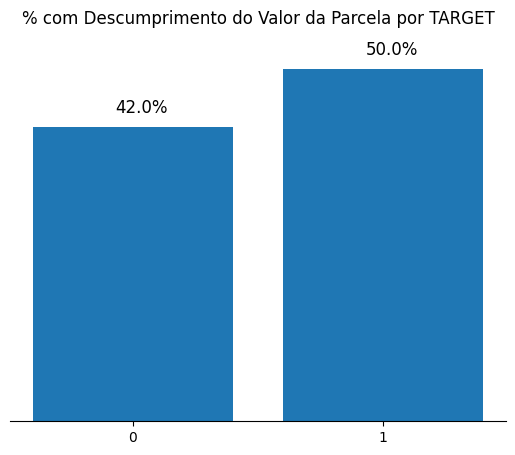

In [16]:
num_pymt_target_0, num_pymt_target_1 = gb_lower_pymt.groupby(level=0).sum() # Total de clientes por TARGET.
num_gb_pymt_0, num_gb_pymt_1 = gb_lower_pymt.xs(1, level=1) # Total de clientes que não cobriram toda a parcela por TARGET.

# Plotando o gráfico evidenciando a diferença apontada pelo Teste de Hipóteses.
bar_prop([0,1], [num_gb_pymt_0/num_pymt_target_0, num_gb_pymt_1/num_pymt_target_1], '% com Descumprimento do Valor da Parcela por TARGET')

<h3 style='font-size:30px;font-style:italic'> EDA Histórico do Cliente com o Banco e Outras Instituições</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Vamos tentar obter uma visão holística sobre os nossos clientes, analisando informações deles com nosso banco e outras instituições.
        </li>
        <li> 
            Teremos a oportunidade de também avaliarmos se a nossa concessão de crédito está em mesmos patamares que os da concorrência. 
        </li>
     </ul>
</div>

In [17]:
df_previous = pd.read_csv('/kaggle/input/home-credit-default-risk/previous_application.csv') # Base de últimas aplicações com o banco.
df_bureau = pd.read_csv('/kaggle/input/home-credit-default-risk/bureau.csv') # Base de últimas aplicações com outros bancos.

In [18]:
# Acrescentando as FLAG's de target nos datasets.
df_previous = df_previous.merge(df_train[['TARGET', 'SK_ID_CURR']], how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
df_bureau = df_bureau.merge(df_train[['TARGET', 'SK_ID_CURR']], how='inner', left_on='SK_ID_CURR', right_on='SK_ID_CURR')

In [19]:
# Dataset de últimas aplicações com o banco.
df_previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0
1,1696966,271877,Consumer loans,68258.655,1800000.0,1754721.0,180000.0,1800000.0,SATURDAY,18,Y,1,0.101325,NaN,NaN,XAP,Refused,-472,Cash through the bank,SCO,NaN,Repeater,Clothing and Accessories,POS,XNA,Regional / Local,55,Furniture,36.0,low_normal,POS industry with interest,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,0


In [20]:
# Dataset de últimas aplicações com outros bancos.
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,TARGET
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,0
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,0
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,0
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,0
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,0


<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> Qualidade da Exposição ao Risco</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Poderíamos levantar a seguinte pergunta: o banco concede aos seus clientes inadimplentes valores similares que seus concorrentes? Como anda a sua exposição ao risco?
        </li>
     </ul>
</div>

In [21]:
# Média e std's do empréstimos aprovados pelo banco.
df_previous_approved = df_previous[df_previous['NAME_CONTRACT_STATUS']=='Approved']
df_previous_approved#.groupby('TARGET').agg({'AMT_CREDIT':['mean', 'std']})

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,TARGET
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.000000,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0,0
2,2154916,271877,Consumer loans,12417.390,108400.5,119848.5,0.0,108400.5,SUNDAY,14,Y,1,0.000000,NaN,NaN,XAP,Approved,-548,Cash through the bank,XAP,NaN,New,Furniture,POS,XNA,Stone,196,Furniture,12.0,middle,POS industry with interest,365243.0,-512.0,-182.0,-392.0,-387.0,0.0,0
3,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0,0
4,1536272,108129,Cash loans,21709.125,450000.0,512370.0,NaN,450000.0,WEDNESDAY,9,Y,1,NaN,NaN,NaN,XNA,Approved,-515,XNA,XAP,NaN,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),6,XNA,36.0,low_normal,Cash X-Sell: low,365243.0,-485.0,565.0,-155.0,-147.0,1.0,0
5,2068863,108129,Consumer loans,4830.930,47250.0,23688.0,24750.0,47250.0,THURSDAY,11,Y,1,0.556485,NaN,NaN,XAP,Approved,-619,Cash through the bank,XAP,Family,Repeater,Audio/Video,POS,XNA,Stone,110,Consumer electronics,6.0,high,POS household with interest,365243.0,-588.0,-438.0,-588.0,-580.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413695,1538587,293561,Consumer loans,3190.185,29475.0,28714.5,2947.5,29475.0,SUNDAY,11,Y,1,0.101386,NaN,NaN,XAP,Approved,-2693,Cash through the bank,XAP,Children,New,Audio/Video,POS,XNA,Country-wide,312,Consumer electronics,10.0,low_normal,POS household without interest,365243.0,-2662.0,-2392.0,-2392.0,-2357.0,1.0,0
1413696,1261221,277978,Consumer loans,6030.675,133866.0,133866.0,0.0,133866.0,SATURDAY,15,Y,1,0.000000,NaN,NaN,XAP,Approved,-832,Cash through the bank,XAP,Unaccompanied,New,Consumer Electronics,POS,XNA,Regional / Local,200,Consumer electronics,24.0,low_action,POS household without interest,365243.0,-801.0,-111.0,-531.0,-518.0,0.0,0
1413697,1563733,227766,Consumer loans,13726.080,137250.0,123525.0,13725.0,137250.0,SATURDAY,14,Y,1,0.108909,NaN,NaN,XAP,Approved,-495,Cash through the bank,XAP,NaN,New,Audio/Video,POS,XNA,Stone,154,Consumer electronics,10.0,low_normal,POS household with interest,365243.0,-464.0,-194.0,-194.0,-186.0,0.0,0
1413698,2319569,239799,Consumer loans,4716.495,46800.0,46800.0,0.0,46800.0,FRIDAY,9,Y,1,0.000000,NaN,NaN,XAP,Approved,-160,Cash through the bank,XAP,Unaccompanied,New,Construction Materials,POS,XNA,Regional / Local,50,Construction,12.0,middle,POS industry with interest,365243.0,-119.0,211.0,365243.0,365243.0,0.0,0


In [22]:
# Média e std's do empréstimos aprovados por outras instituições.
df_bureau.groupby('TARGET').agg({'AMT_CREDIT_SUM':['mean', 'std']})

AMT_CREDIT_SUM              
                 mean           std
TARGET                             
0       355017.990578  1.104648e+06
1       312420.725270  6.889266e+05

In [23]:
ztest(df_previous[df_previous['TARGET']==0]['AMT_CREDIT'].to_numpy(),#.sample(1000, random_state=42), 
      df_bureau[df_bureau['TARGET']==0]['AMT_CREDIT_SUM'].to_numpy(),#.sample(1000, random_state=42), 
      alternative='two-sided',)

(nan, nan)

<p style='color:red'> O que fazer com a Análise de Risco? Considerar Outliers na EDA?</p>